# Case Study 1

# Importing Packages

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sb
%pip install pydot
%pip install graphviz
import pydot
import graphviz



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Read file into dataframe

In [94]:
df = pd.read_csv("loans_full_schema.csv")

In [95]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [96]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


Each feature statistics as be seen from the above describe dataframe

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

# Dimension of data 

In [98]:
df.shape

(10000, 55)

# Duplicate Value Check

In [99]:
df.duplicated().sum()

0

# Null Value Check 

In [100]:
df.isnull().mean()

emp_title                           0.0833
emp_length                          0.0817
state                               0.0000
homeownership                       0.0000
annual_income                       0.0000
verified_income                     0.0000
debt_to_income                      0.0024
annual_income_joint                 0.8505
verification_income_joint           0.8545
debt_to_income_joint                0.8505
delinq_2y                           0.0000
months_since_last_delinq            0.5658
earliest_credit_line                0.0000
inquiries_last_12m                  0.0000
total_credit_lines                  0.0000
open_credit_lines                   0.0000
total_credit_limit                  0.0000
total_credit_utilized               0.0000
num_collections_last_12m            0.0000
num_historical_failed_to_pay        0.0000
months_since_90d_late               0.7715
current_accounts_delinq             0.0000
total_collection_amount_ever        0.0000
current_ins

In [101]:
missing_features = df.columns[df.isnull().mean() > 0.5]

In [102]:
missing_features

Index(['annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'months_since_last_delinq',
       'months_since_90d_late'],
      dtype='object')

# Delete features were more than 50% values are missing

In [103]:
df.drop(missing_features, axis=1, inplace=True)

In [104]:
df.shape

(10000, 50)

In [105]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'issue_mon

In [106]:
df = df.dropna( how='any',
                    subset=['emp_title', 'debt_to_income'])

In [107]:
df.shape

(9166, 50)

# Immute missing values using KNN

In [108]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)

X = np.round(knn_imputer.fit_transform(df[['emp_length']]))
pd.DataFrame(X).head()
df['emp_length'] = X

In [109]:
df.isnull().mean()

emp_title                           0.000000
emp_length                          0.000000
state                               0.000000
homeownership                       0.000000
annual_income                       0.000000
verified_income                     0.000000
debt_to_income                      0.000000
delinq_2y                           0.000000
earliest_credit_line                0.000000
inquiries_last_12m                  0.000000
total_credit_lines                  0.000000
open_credit_lines                   0.000000
total_credit_limit                  0.000000
total_credit_utilized               0.000000
num_collections_last_12m            0.000000
num_historical_failed_to_pay        0.000000
current_accounts_delinq             0.000000
total_collection_amount_ever        0.000000
current_installment_accounts        0.000000
accounts_opened_24m                 0.000000
months_since_last_credit_inquiry    0.122409
num_satisfactory_accounts           0.000000
num_accoun

In [110]:
obj_features = ['emp_title','state','homeownership', 'verified_income','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status','disbursement_method']
numOfCategoriesn =[]
def findUniqueRecords(features):
    for i in features:
        numOfCategoriesn.append(df[i].nunique())
findUniqueRecords(obj_features)

In [111]:
numOfCategoriesn

[4741, 50, 3, 3, 12, 2, 7, 32, 3, 6, 2, 2]

# Label encoding

In [112]:
def convertToCat(features):
    for i in features:
        df[i]=df[i].astype('category')
        var = i+"_cat"
        df[var]=df[i].cat.codes
convertToCat(obj_features)

In [113]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,homeownership_cat,verified_income_cat,loan_purpose_cat,application_type_cat,grade_cat,sub_grade_cat,issue_month_cat,loan_status_cat,initial_listing_status_cat,disbursement_method_cat
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,0,2,7,0,2,12,2,1,1,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,2,0,2,0,2,10,0,1,1,0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,2,1,8,0,3,15,0,1,0,0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,2,0,2,0,0,2,1,1,1,0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,2,2,1,1,2,12,2,1,1,0


# Remove all categorical variable and add corresponding labels

In [114]:
dropFeatures=['emp_title','state','homeownership', 'verified_income','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status',"num_accounts_120d_past_due","months_since_last_credit_inquiry",'initial_listing_status','disbursement_method',"interest_rate"]
X = df.drop(columns=dropFeatures,axis=1)
y = df['interest_rate']




In [115]:
feature_list = X.columns

# Visualization

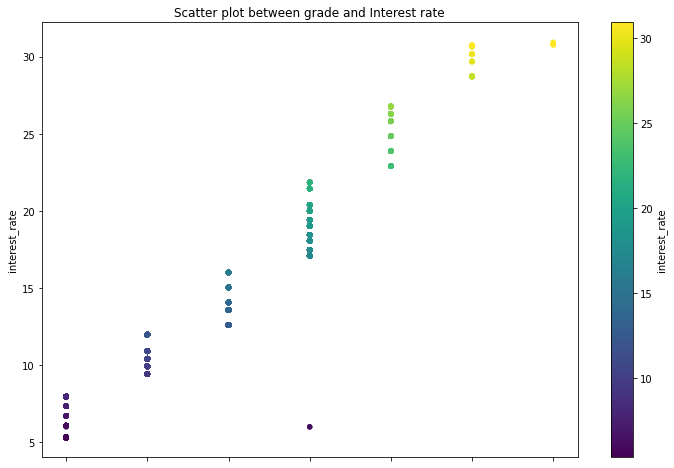

In [116]:
#Scatter plot between interest rate and grade associated with grade of loan
df.plot.scatter(x='grade_cat', y='interest_rate', figsize=(12,8),title= "Scatter plot between grade and Interest rate",c="interest_rate",cmap='viridis');

plt.show(block=True);



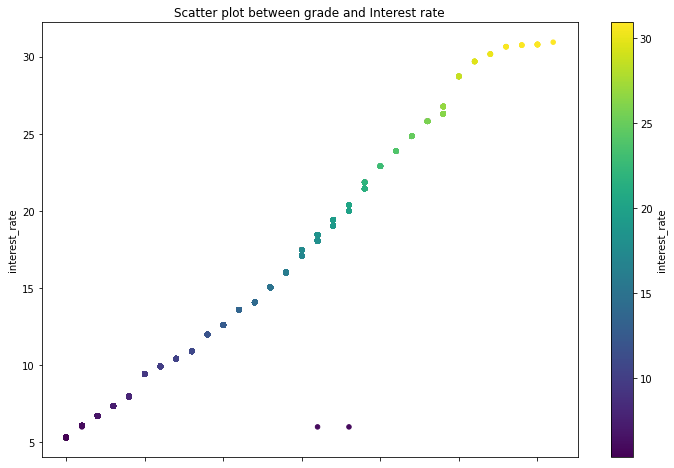

In [117]:
#Scatter plot between interest rate and grade associated with subgrade of loan
df.plot.scatter(x='sub_grade_cat', y='interest_rate', title= "Scatter plot between grade and Interest rate",c='interest_rate',colormap='viridis',figsize=(12,8));

plt.show(block=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5814CF3D0>]],
      dtype=object)

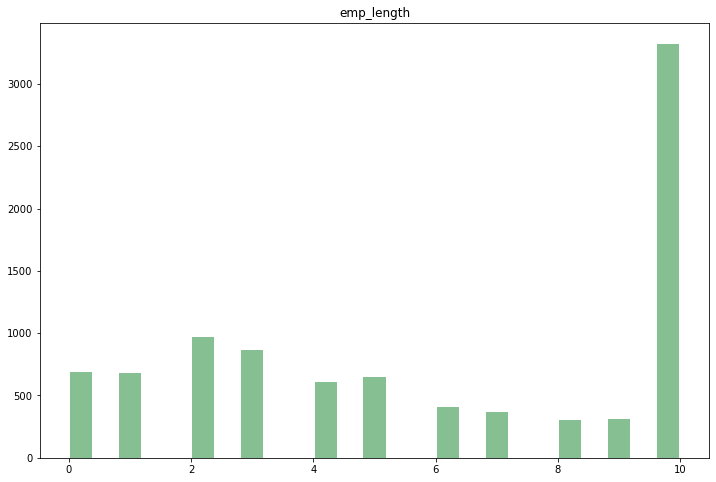

In [118]:
#Histogram plot of employee tenure
df.hist(column='emp_length', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D584C717F0>]],
      dtype=object)

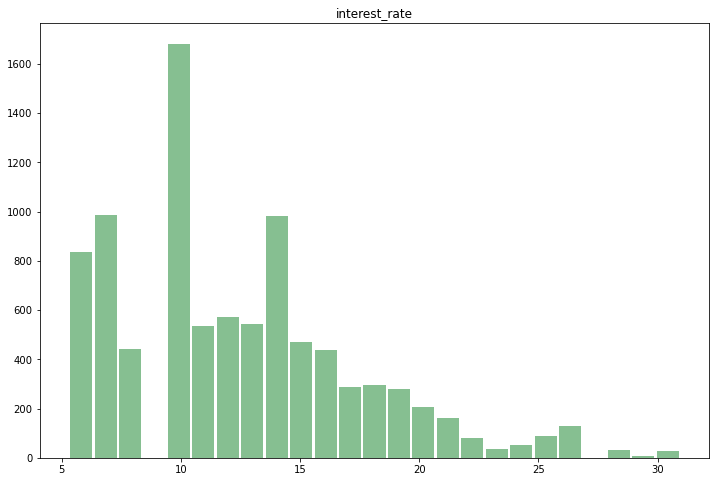

In [119]:
#Histogram of interest rate 
df.hist(column='interest_rate', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5852EC610>]],
      dtype=object)

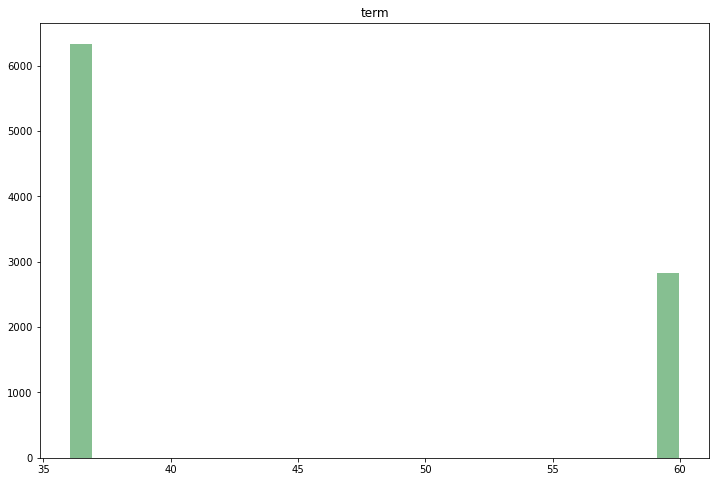

In [120]:
#Histogram of term 
df.hist(column='term', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# Train test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardization

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression

In [123]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Intercept of linear regression

In [124]:
print(regressor.intercept_)

12.42006513597318


# linear regression coefficient

In [125]:
print(regressor.coef_)

[ 1.37907718e-02  3.66660539e-03 -1.86366828e-02 -4.41902948e-03
 -2.08534279e-02 -1.12929162e-02  4.96943056e-03  1.67593860e-01
  2.51680302e-02 -3.33770144e-02 -5.05953936e-03 -9.82041570e-03
  3.25519142e-06  5.04235573e-03  3.76449375e-02 -1.07130691e-02
 -2.11570541e-01  1.09945177e-06 -3.41655625e-02  9.27524109e-02
  5.62347560e-03  5.15355435e-02 -4.65444875e-02 -5.16336507e-03
  2.03960411e-02 -2.09861402e-03 -1.14918792e-02 -8.20358967e-01
  2.30042269e-01  7.93850910e-01 -1.20153018e-01 -3.23163510e+04
  3.17684869e+04  4.14797883e+03  1.50810318e+01  2.74579679e-04
  1.37822117e-03 -3.81091556e-03 -1.91898633e-03  1.89835428e-02
  1.95032602e-02  4.63665835e-01  4.40494393e+00  3.34615055e-02
  3.01582050e-02  7.37906286e-03  4.17964394e-02]


In [126]:
y_pred = regressor.predict(X_test)

# Predicted V/s Actual values

In [127]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
792,5.32,4.347361
2013,10.42,10.329332
2224,9.44,9.163028
1426,17.47,17.546188
6349,14.08,14.661853
...,...,...
8436,7.96,7.764793
8469,7.97,7.747396
4212,6.72,6.249314
9042,14.07,14.676131


# Model metrics 

In [128]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.41298329499770947
Mean Squared Error: 0.33439633712754796
Root Mean Squared Error: 0.5782701247060477


# Backtracking

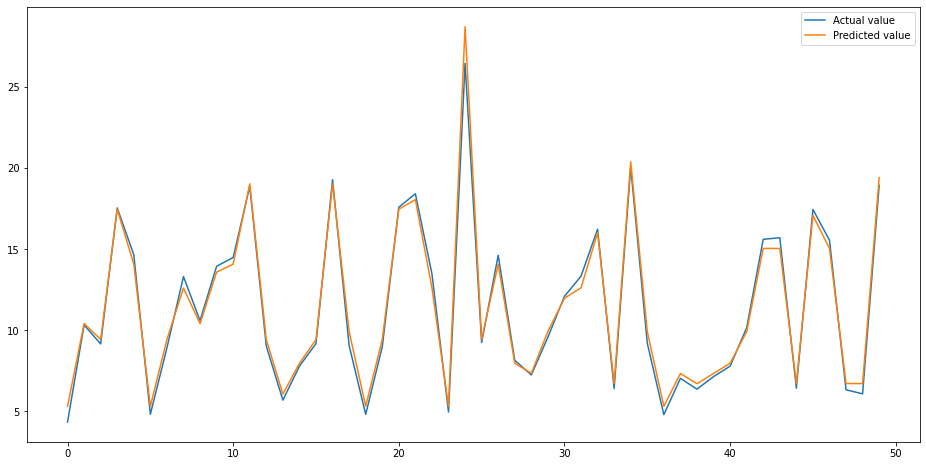

In [129]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# Lasso 

In [130]:
lasso_model = Lasso().fit(X_train,y_train)
lasso_model.intercept_


12.42006513597134

# Lasso coefficient

In [131]:
lasso_model.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  3.96447706, -0.        ,  0.        ,
       -0.        , -0.        ])

In [132]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,100)

# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

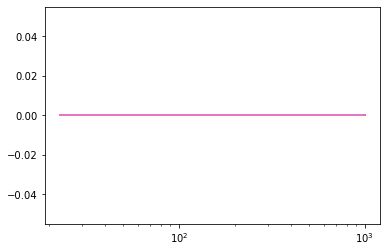

In [133]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")

In [134]:
y_pred = lasso_model.predict(X_test)


In [135]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
792,5.32,6.225497
2013,10.42,10.965451
2224,9.44,9.611179
1426,17.47,16.382542
6349,14.08,14.351133
...,...,...
8436,7.96,8.934042
8469,7.97,8.934042
4212,6.72,7.579769
9042,14.07,14.351133


# Model Metrics

In [136]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7880163156097301
Mean Squared Error: 1.3943103058308062
Root Mean Squared Error: 1.180809174181335


# Back tracking 

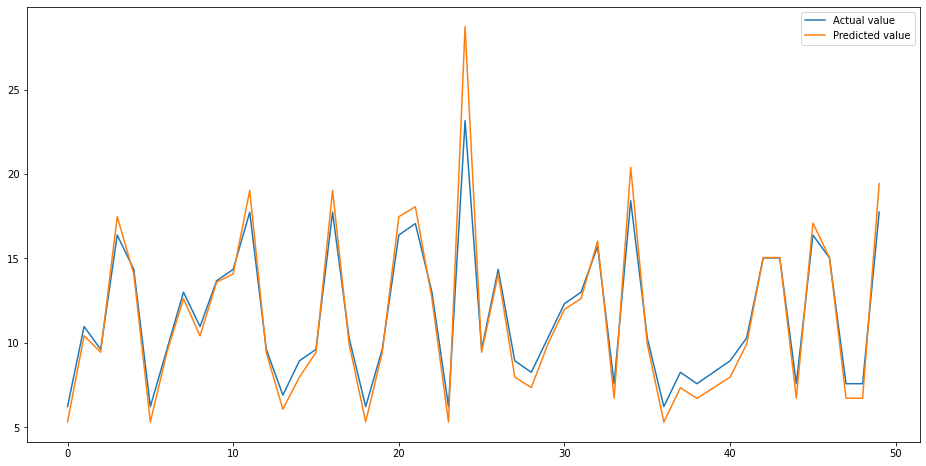

In [137]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# RandomForest

In [138]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [139]:
rf.fit(X_train, y_train);

In [140]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [141]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.85 %.


In [143]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sub_grade_cat        Importance: 0.95
Variable: grade_cat            Importance: 0.05
Variable: emp_length           Importance: 0.0
Variable: annual_income        Importance: 0.0
Variable: debt_to_income       Importance: 0.0
Variable: delinq_2y            Importance: 0.0
Variable: earliest_credit_line Importance: 0.0
Variable: inquiries_last_12m   Importance: 0.0
Variable: total_credit_lines   Importance: 0.0
Variable: open_credit_lines    Importance: 0.0
Variable: total_credit_limit   Importance: 0.0
Variable: total_credit_utilized Importance: 0.0
Variable: num_collections_last_12m Importance: 0.0
Variable: num_historical_failed_to_pay Importance: 0.0
Variable: current_accounts_delinq Importance: 0.0
Variable: total_collection_amount_ever Importance: 0.0
Variable: current_installment_accounts Importance: 0.0
Variable: accounts_opened_24m  Importance: 0.0
Variable: num_satisfactory_accounts Importance: 0.0
Variable: num_accounts_30d_past_due Importance: 0.0
Variable: num_ac

In [144]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
# grade_cat and sub_grade_cat
train_important = X_train[:, [41,42]]
test_important = X_test[:, [41,42]]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
Accuracy: 99.74 %.


# Imortant varibales 

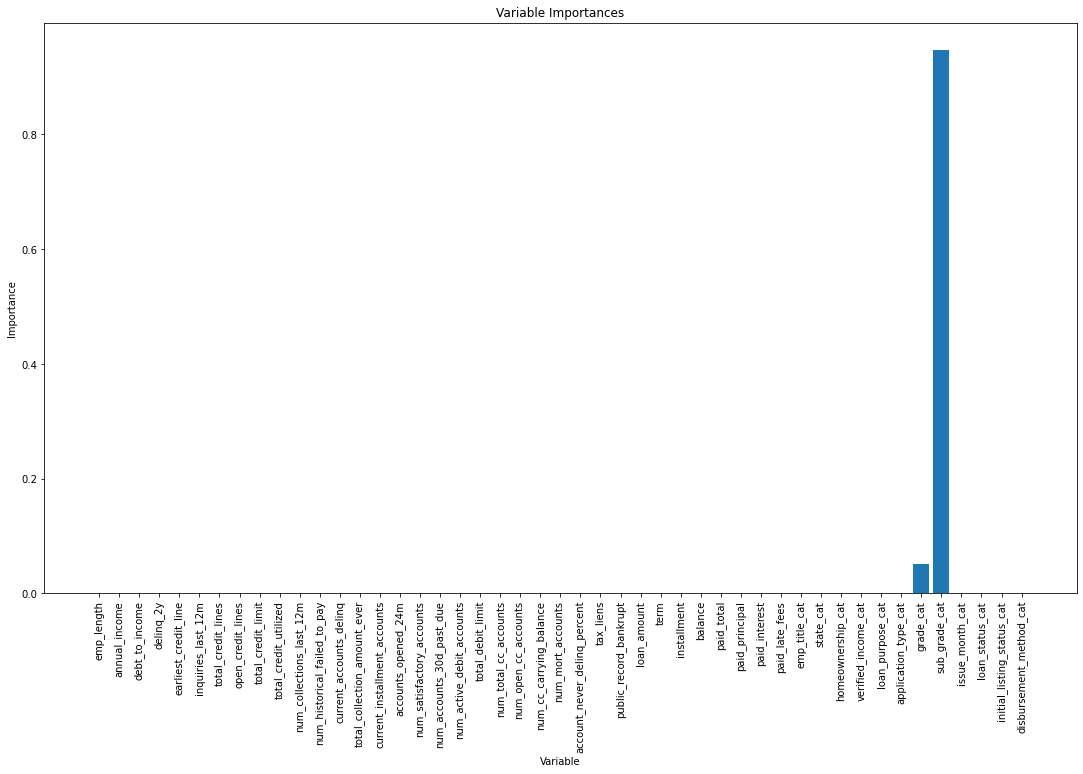

In [145]:
from matplotlib.pyplot import figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


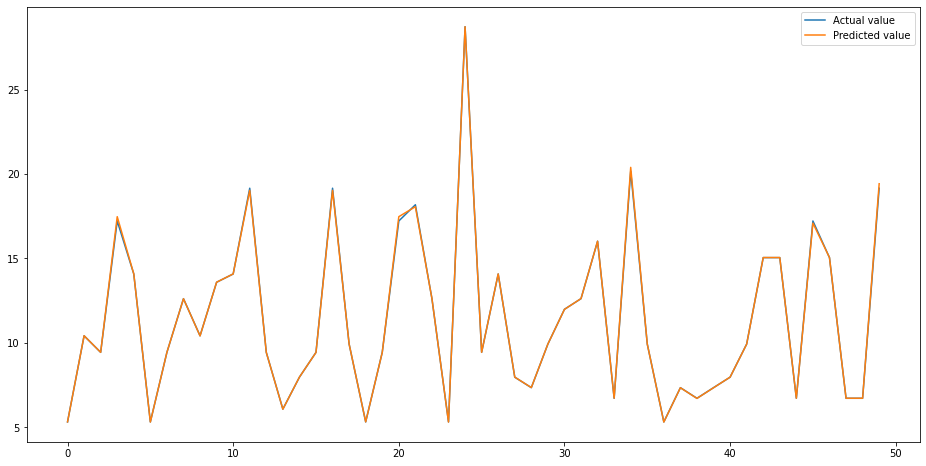

In [146]:
test = pd.DataFrame({'Predicted value':predictions, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])